Univerzitet u Novom Sadu

Fakultet tehničkih nauka

Departman za industrijsko inženjerstvo i menadžment

Inženjerstvo informacionih sistema

Predmet: Principi prezentacije i prepoznavanja oblika

Tema: Segmentacija

Student: Filip Tintor
 IT4/2020

# UVOD
Tema ovog projekta jeste segmentacija. Segmentacija predstavlja jednu od tehnika digitalne obrade slike. Projekat je podeljen na dva dela, teorijski i praktični deo. U teorijskom delu objašnjeno je šta segmentacija predstavlja i opisan je set podataka koji je korišćen za izradu praktičnog dela. Nakon toga predstavljen je praktični deo projekta.

# SEGMENTACIJA
Segmentacija predstavlja proces podele fotografija na više segmenata, odnosno regiona. Segmentacija fotografije je jedan od najvažnijih procesa kada je u pitanju računarska obrada fotografije. Podrazumeva proces koji deli fotografiju na njene sastavne delove, izdvajajući delove (segmente) koji su od interesa u odnosu na prirodu fotografija. Ti segmenti su definisani kao grupe piksela koji dele zajedničke karakteristike (npr. intenzitet piksela, tekstura itd.).

Tehnike segmentacije slike možemo podeliti u tri glavne kategorije:[1]

  1. Rast i smanjenje regiona
  2. Metode grupisanja (klastering)
  3. Detekcija granica

Metode rasta i smanjivanja regiona koriste domen slike na osnovu reda i kolone. Tehnike grupisanja se mogu primeniti na bilo koji domen, kao što je bilo koji N-dimenzionalna boja ili prostor obeležja, čije komponente mogu čak uključivati i koordinate prostornog domena. Iz ove perspektive, kategorija regiona koja raste i smanjuje se može se smatrati podskupom metoda grupisanja, ali je ograničena na prostorni domen. Metoda detekcije granica je proširenje tehnika detekcije ivica.

Postoje dve osnovne vrste segmentacije
1. semantička segmentacija
2. segmentacija instance.

Semantička segmentacija podrazumeva tehniku izdvajanja regiona i kao takva izdvaja ceo objekat od pozadine pridružujući piksele čija je svetlost ispot nekog praga pozadine. S druge strane, segmentacije instance predstavlja tehniku pronalaženja ivica koja je zasnovana na izdvajanju samo onih piksela koji pripadaju ivicama objekta.

# SET PODATAKA
Set podataka predstavlja skup slika i njihovih maski na kojima je moguće detektovati so. Maske predstavljaju delove slike na kojima se nalazi so. Postoje dva seta podataka, trening i test podaci. U svakom folderu se nalaze slike i maske. Krajnji rezultat se upisuje u csv fajl pod nazivom *sample_submission*, odnosno za svaku sliku se upisuje na kojim pikselima se nalazi so. Takođe postoje još dva csv fajla. U jednom se nalaze maske slika u kodiranom formatu, dok se u drugom nalaze dubine slika.

# Zaključak
Tema je ispraćena kroz skup podataka u vidu slika i maski seizmičkih istraživanja. Cilj je bio odrediti segmente prisustva soli.
Rad na ovom projektu je omogućio lakše razumevanje segmentacije slika, funkcionisanja neuronskih mreža kao i razumevanja dobijenog skupa podataka.


In [ ]:
!pip install gdown

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/127tIx29IcAwHa0MT-D3dt1eyv-G7ixVm/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=127tIx29IcAwHa0MT-D3dt1eyv-G7ixVm
From (redirected): https://drive.google.com/uc?id=127tIx29IcAwHa0MT-D3dt1eyv-G7ixVm&confirm=t&uuid=1632ec2a-9a8e-476b-bc48-e352fcee2ce6
To: /content/dataset.zip
100% 466M/466M [00:11<00:00, 41.7MB/s]


Na početku je prvo preuzet i raspakovan skup podataka.


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: competition_data.zip    
  inflating: depths.csv              
  inflating: flamingo.zip            
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.csv               
  inflating: train.zip               


In [ ]:
!mkdir -p /content/dataset/train
!unzip train.zip -d /content/dataset/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/images/d80ead8703.png  
  inflating: /content/dataset/train/images/b012e9ebb0.png  
  inflating: /content/dataset/train/images/d3034e7a60.png  
  inflating: /content/dataset/train/images/ae2ef70d51.png  
  inflating: /content/dataset/train/images/1af44a9db0.png  
  inflating: /content/dataset/train/images/41cfd4b320.png  
  inflating: /content/dataset/train/images/853e89d0d3.png  
  inflating: /content/dataset/train/images/2a484baa26.png  
  inflating: /content/dataset/train/images/92e617896e.png  
  inflating: /content/dataset/train/images/b70f0ab0c2.png  
  inflating: /content/dataset/train/images/e8757626a1.png  
  inflating: /content/dataset/train/images/6a3d92ce59.png  
  inflating: /content/dataset/train/images/127ef4105f.png  
  inflating: /content/dataset/train/images/d21012f5c1.png  
  inflating: /content/dataset/train/images/1cb9549d2c.png  
  inflating: /content/dataset/train/images/e030bd

Nakon učitavanja podataka neophodno je importovati neophodne biblioteke koje će se koristiti u daljoj izradi projekta.

In [ ]:
!mkdir -p /content/dataset/test
!unzip test.zip -d /content/dataset/test

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/test/images/a3df74dd31.png  
  inflating: /content/dataset/test/images/187ecc32d5.png  
  inflating: /content/dataset/test/images/54538419f5.png  
  inflating: /content/dataset/test/images/93614d4b95.png  
  inflating: /content/dataset/test/images/50a91adce8.png  
  inflating: /content/dataset/test/images/97d23cea10.png  
  inflating: /content/dataset/test/images/ca04c19c0b.png  
  inflating: /content/dataset/test/images/d168218bac.png  
  inflating: /content/dataset/test/images/a670e833a4.png  
  inflating: /content/dataset/test/images/a964a0f499.png  
  inflating: /content/dataset/test/images/371bf59030.png  
  inflating: /content/dataset/test/images/fc74f77bae.png  
  inflating: /content/dataset/test/images/f63dc1e3be.png  
  inflating: /content/dataset/test/images/b807539a5f.png  
  inflating: /content/dataset/test/images/1dfcbf4bca.png  
  inflating: /content/dataset/test/images/a971d2ae53.png  
  inf

* os: Modul za interakciju sa operativnim sistemom. Koristi se za manipulaciju putanjama datoteka i direktorijuma.
* random: Modul za generisanje slučajnih brojeva.
* time: Modul za rad sa vremenom i merenje vremenskih intervala.
* math: Modul za matematičke operacije i funkcije.
* glob: Modul za pretragu datoteka na osnovu zadatih kriterijuma.
* numpy as np: Biblioteka za numeričke operacije, posebno rad sa višedimenzionalnim nizovima.
* pandas: Biblioteka za manipulaciju i analizu podataka, posebno tabularnih podataka.
* matplotlib.pyplot: Biblioteka za vizualizaciju podataka, kao što su grafici i dijagrami.
* torch: Biblioteka za mašinsko učenje i duboko učenje.
* torch.nn: Modul koji sadrži različite klase za definisanje neuronskih mreža.
* torch.nn.functional: Modul koji sadrži različite funkcije aktivacije, gubitke i druge funkcije koje se često koriste u neuronskim mrežama.
* torchvision: Biblioteka koja pruža pristup popularnim skupovima podataka, modelima i transformacijama za kompjuterski vid.
* torchvision.transforms: Modul koji sadrži različite transformacije slika koje se koriste u kompjuterskom vidu.
* Dataset, DataLoader: Klase koje olakšavaju manipulaciju podacima prilikom obuke neuronskih mreža.
* Image: Modul koji pruža podršku za manipulaciju slikama.

In [ ]:
import os
import random
import time
import math
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as T

from torch.utils.data import Dataset, DataLoader

from PIL import Image

CUDA (engl. *Compute Unified Device Architecture*) je paralelna računarska platforma i API (engl. *Application Programming Interface*) koju je razvio NVIDIA za izvršavanje zahtevnih računarskih operacija na GPU-ima (engl.* Graphics Processing Units*).

Postavljanje device-a na "cuda" omogućava korišćenje GPU-a za ubrzanje izračunavanja prilikom obuke i evaluacije neuronske mreže.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

SAMPLE_SUBMISSION_PATH = 'sample_submission.csv': Ovo je putanja do CSV datoteke koja sadrži uzorak (šablon) za podnošenje rezultata.

MODEL_OUTPUT_PATH = 'unet_model.pth': Ovo je putanja do datoteke u kojoj će biti sačuvan model nakon obuke.

In [ ]:
DATASET_PATH = '/content/dataset/'

IMAGE_TRAIN_PATH = os.path.join(DATASET_PATH, 'train/images')
MASK_TRAIN_PATH = os.path.join(DATASET_PATH, 'train/masks')
IMAGE_TEST_PATH = os.path.join(DATASET_PATH, 'test/images')

SAMPLE_SUBMISSION_PATH = 'sample_submission.csv'

MODEL_OUTPUT_PATH = 'unet_model.pth'

In [ ]:
image_train = os.listdir(IMAGE_TRAIN_PATH)
mask_train = os.listdir(MASK_TRAIN_PATH)

Definisanje subplot-a sa 4 reda u 4 kolone, čime se kreira mreža za umetanje slika i omogućava kreiranje grafikona. Suština je transformacija slika u tenzore.

transforms = T.Compose([T.Grayscale(), T.ToTensor()]): Definiše se transformacija koja će biti primenjena na sliku i masku. U ovom slučaju, transformacije uključuju konverziju u grayscale i konverziju u tenzor.

image/mask = torch.stack([transforms(image/mask)]): Primenjuje se transformacija na sliku/masku i rezultat se smešta u tenzor. torch.stack() funkcija se koristi za dodavanje dodatne dimenzije tenzoru, kako bi odgovarao očekivanim dimenzijama ulaza za model.

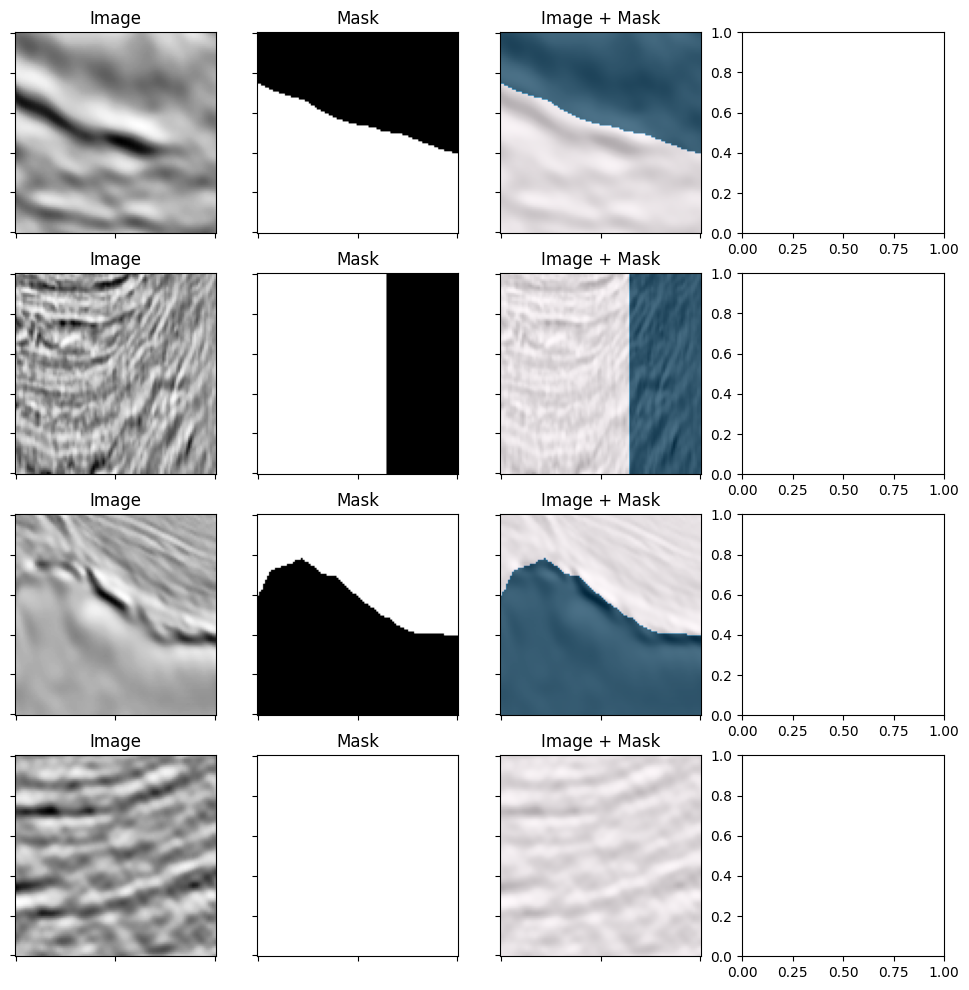

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,12))

for i in range(4):
    r = random.randint(0, len(image_train) - 1)

    image = Image.open(os.path.join(IMAGE_TRAIN_PATH + '/{}'.format(image_train[r])))
    mask = Image.open(os.path.join(MASK_TRAIN_PATH + '/{}'.format(mask_train[r])))

    transforms = T.Compose([T.Grayscale(), T.ToTensor()])

    image = torch.stack([transforms(image)])
    mask = torch.stack([transforms(mask)])

    ax[i,0].imshow(image.squeeze(), cmap='Greys')
    ax[i,1].imshow(mask.squeeze(), cmap='Greys')
    ax[i,2].imshow(image.squeeze(), cmap='Greys')
    ax[i,2].imshow(mask.squeeze(), cmap='PuBu', alpha=0.7)

    ax[i,0].set_yticklabels([])
    ax[i,0].set_xticklabels([])
    ax[i,1].set_yticklabels([])
    ax[i,1].set_xticklabels([])
    ax[i,2].set_yticklabels([])
    ax[i,2].set_xticklabels([])

    ax[i,0].set_title('Image', loc='center')
    ax[i,1].set_title('Mask', loc='center')
    ax[i,2].set_title('Image + Mask', loc='center')

plt.show()

Klasa Segmentation_Dataset omogućava jednostavno učitavanje i transformaciju slika i maski za segmentaciju. Pomoću ovog dataset-a, može se koristiti i DataLoader za efikasno učitavanje podataka tokom obuke i evaluacije modela.

In [ ]:
class Segmentation_Dataset(Dataset):
    def __init__(self, image_path, mask_path):
        self.image_path = image_path
        self.mask_path = mask_path

        images = glob.glob(image_path + '/*.png')

        samples = []

        for image in images:
            samples.append(image.split('/')[-1].split('.')[0])

        self.samples = samples

        self.transforms = T.Compose([T.Grayscale(), T.ToTensor()])

    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.image_path, self.samples[idx] + '.png'))
        mask = Image.open(os.path.join(self.mask_path, self.samples[idx] + '.png'))

        return self.transforms(image), self.transforms(mask)

    def __len__(self):
        return len(self.samples)

In [ ]:
train_dataset = Segmentation_Dataset(IMAGE_TRAIN_PATH, MASK_TRAIN_PATH)

ConovolutionBlock klasa se obično koristi za izgradnju složenijih arhitektura neuronskih mreža, gde se blokovi konvolucije ponavljaju kako bi se izgradila dublja mreža sa više kanala i slojeva.

In [ ]:
class ConvolutionBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, activation=True):
        super(ConvolutionBlock, self).__init__()

        self.activation = activation

        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=kernel_size // 2)

        self.norm = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.conv(x)
        x = self.norm(x)

        if self.activation:
            return F.relu(x)
        else:
            return x

Rezidualni blok omogućava neuronskoj mreži da "preskoči" slojeve i prenese informacije sa ulaza direktno na izlaz, čime se olakšava učenje i umanjuje problem nestajućeg gradijenta. Ovi blokovi se često koriste u dubokim arhitekturama kao što su ResNet i DenseNet.

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3):
        super(ResidualBlock, self).__init__()

        self.norm = nn.BatchNorm2d(in_channels)

        self.conv1 = ConvolutionBlock(in_channels, out_channels, kernel_size)
        self.conv2 = ConvolutionBlock(out_channels, out_channels, kernel_size, activation=False)

    def forward(self, x):
        residual = x

        x = F.relu(x)

        x = self.norm(x)
        x = self.conv1(x)
        x = self.conv2(x)

        return x

Blok Dekonvolucije se koristi za povećavanje rezolucije ulaznih slika. Na primer, može se koristiti za rekonstrukciju detalja koji su izgubljeni tokom downsamplinga u prethodnim slojevima mreže.

In [ ]:
class DeconvolutionBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=2, stride=2):
        super(DeconvolutionBlock, self).__init__()

        self.deconv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride)

    def forward(self, x1, x2):
        xd = self.deconv(x1)

        x = torch.cat([xd,x2], dim=1)

        return x

Klasa UNet predstavlja implementaciju UNet arhitekture za segmentaciju slika. UNet je popularna arhitektura koja se često koristi u zadacima segmentacije slika, posebno za segmentaciju pojedinačnih objekata ili regiona unutar slike.

In [ ]:
class UNet(nn.Module):
    def __init__(self, filters=16, dropout=0.5):
        super(UNet, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, filters, 3, padding=1),
            ResidualBlock(filters, filters),
            ResidualBlock(filters, filters),
            nn.ReLU()
        )

        self.conv2 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout / 2),
            nn.Conv2d(filters, filters * 2, 3, padding=1),
            ResidualBlock(filters * 2, filters * 2),
            ResidualBlock(filters * 2, filters * 2),
            nn.ReLU()
        )

        self.conv3 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout),
            nn.Conv2d(filters * 2, filters * 4, 3, padding=1),
            ResidualBlock(filters * 4, filters * 4),
            ResidualBlock(filters * 4, filters * 4),
            nn.ReLU()
        )

        self.conv4 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout),
            nn.Conv2d(filters * 4, filters * 8, 3, padding=1),
            ResidualBlock(filters * 8, filters * 8),
            ResidualBlock(filters * 8, filters * 8),
            nn.ReLU()
        )

        self.middle = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout),
            nn.Conv2d(filters * 8, filters * 16, 3, padding=3 // 2),
            ResidualBlock(filters * 16, filters * 16),
            ResidualBlock(filters * 16, filters * 16),
            nn.ReLU()
        )

        self.deconv4 = DeconvolutionBlock(filters * 16, filters * 8, 2)

        self.upconv4 = nn.Sequential(
            nn.Dropout(dropout),
            nn.Conv2d(filters * 16, filters * 8, 3, padding=1),
            ResidualBlock(filters * 8, filters * 8),
            ResidualBlock(filters * 8, filters * 8),
            nn.ReLU()
        )

        self.deconv3 = DeconvolutionBlock(filters * 8, filters * 4, 3)

        self.upconv3 = nn.Sequential(
            nn.Dropout(dropout),
            nn.Conv2d(filters * 8, filters * 4, 3, padding=1),
            ResidualBlock(filters * 4, filters * 4),
            ResidualBlock(filters * 4, filters * 4),
            nn.ReLU()
        )

        self.deconv2 = DeconvolutionBlock(filters * 4, filters * 2, 2)

        self.upconv2 = nn.Sequential(
            nn.Dropout(dropout),
            nn.Conv2d(filters * 4, filters * 2, 3, padding=1),
            ResidualBlock(filters * 2, filters * 2),
            ResidualBlock(filters * 2, filters * 2),
            nn.ReLU()
        )

        self.deconv1 = DeconvolutionBlock(filters * 2, filters, 3)

        self.upconv1 = nn.Sequential(
            nn.Dropout(dropout),
            nn.Conv2d(filters * 2, filters, 3, padding=1),
            ResidualBlock(filters, filters),
            ResidualBlock(filters, filters),
            nn.ReLU(),
            nn.Dropout(dropout / 2),
            nn.Conv2d(filters, 1, 3, padding=1)
        )

    def forward(self, x):
        conv1 = self.conv1(x)
        # 101 -> 50
        conv2 = self.conv2(conv1)
        # 50 -> 25
        conv3 = self.conv3(conv2)
        # 25 -> 12
        conv4 = self.conv4(conv3)
        # 12 - 6
        x = self.middle(conv4)
        # 6 -> 12
        x = self.deconv4(x, conv4)
        x = self.upconv4(x)
        # 12 -> 25
        x = self.deconv3(x, conv3)
        x = self.upconv3(x)
        # 25 -> 50
        x = self.deconv2(x, conv2)
        x = self.upconv2(x)
        # 50 -> 101
        x = self.deconv1(x, conv1)
        x = self.upconv1(x)

        return x

Funkcija iou_score(outputs, labels) predstavlja implementaciju izračunavanja 'Intersection over Union' (IoU) metrike za ocenu performansi segmentacije. IoU metrika se često koristi za ocenu kvaliteta segmentacije, gde vrednosti bliže 1 ukazuju na bolje rezultate.

In [ ]:
def iou_score(outputs, labels):
    A = labels.squeeze().bool()

    pred = torch.where(outputs < 0., torch.zeros_like(outputs), torch.ones_like(outputs))

    B = pred.squeeze().bool()

    intersection = (A & B).float().sum((1,2))

    union = (A | B).float().sum((1,2))

    iou = (intersection + 1e-6) / (union + 1e-6)

    return iou

Funkcija train_one_batch(model, x, y) predstavlja jednu iteraciju treninga nad jednim mini-batch-om podataka. Ova funkcija se koristi tokom treninga kako bi se izvršila jedna iteracija (prosleđivanje ulaza kroz mrežu, izračunavanje gubitka, propagacija unazad, ažuriranje parametara).

In [ ]:
def train_one_batch(model, x, y):
    x, y = x.to(device), y.to(device)

    outputs = model(x)

    loss = loss_fn(outputs, y)
    iou = iou_score(outputs, y).mean()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    return loss.item(), iou.item()

Ova funkcija se može koristiti za prikazivanje vremena proteklog od nekog trenutka kako bi se pratio napredak treninga ili izvršavanje nekog koda. Na primer, može se koristiti za prikazivanje koliko vremena je proteklo od početka treninga kao što je u ovom primeru.

In [ ]:
def time_since(since):
    now = time.time()

    s = now - since
    m = math.floor(s / 60)
    s -= m * 60

    return '%dm %ds' % (m,s)

Glavna petlja obuhvata epohe i korake unutar svake epohe. U svakoj epohi, petlja prolazi kroz trening dataloader i izvršava funkciju train_one_batch za svaki batch. Nakon svakog koraka se prikazuju trenutni gubitak i IoU za taj korak.

Na kraju svake epohe se prikazuju prosečni gubitak i IoU za tu epohu, kao i proteklo vreme od početka treninga.

Takođe se koristi scheduler da bi se prilagodila stopa učenja na osnovu IoU vrednosti. Scheduler će smanjiti stopu učenja ako se IoU ne poboljšava.

Na kraju petlje se dodaju vrednosti gubitka i IoU u odgovarajuće liste train_loss i train_iou.

Ovaj kod se koristi za treniranje UNet modela na trening podacima u train_dataset.

In [ ]:
NUM_EPOCHS = 5
BATCH_SIZE = 64

model = UNet().to(device)

model.train()

optimizer = torch.optim.Adam(model.parameters())
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max')

loss_fn = nn.BCEWithLogitsLoss()

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

steps = train_dataset.__len__() // BATCH_SIZE

start = time.time()

train_loss = []

train_iou = []

for epoch in range(1, NUM_EPOCHS+1):
    print('Epoch {}/{}'.format(epoch, NUM_EPOCHS))

    running_iou = []
    running_loss = []

    for step, (x,y) in enumerate(train_dataloader):
        loss, iou = train_one_batch(model, x, y)

        running_iou.append(iou)
        running_loss.append(loss)

        print('\r{:6.1f} %\tloss {:8.4f}\tIoU {:8.4f}'.format(100 * (step + 1) / steps, loss, iou), end='')

    print('\r{:6.1f} %\tloss {:8.4f}\tIoU {:8.4f}\t{}'.format(100 * (step + 1) / steps, np.mean(running_loss), np.mean(running_iou), time_since(start)))

    scheduler.step(np.mean(running_iou))

    train_loss.append(loss)
    train_iou.append(iou)

Epoch 1/5
 100.0 %	loss   0.4290	IoU   0.4099	0m 22s
Epoch 2/5
 100.0 %	loss   0.3219	IoU   0.5372	0m 42s
Epoch 3/5
 100.0 %	loss   0.2989	IoU   0.5700	1m 4s
Epoch 4/5
 100.0 %	loss   0.2743	IoU   0.5748	1m 25s
Epoch 5/5
 100.0 %	loss   0.2496	IoU   0.6104	1m 46s


Naredni kod prikazuje grafik gubitka i IoU tokom treninga, što može biti korisno za praćenje performansi modela i evaluaciju napretka tokom epoha.

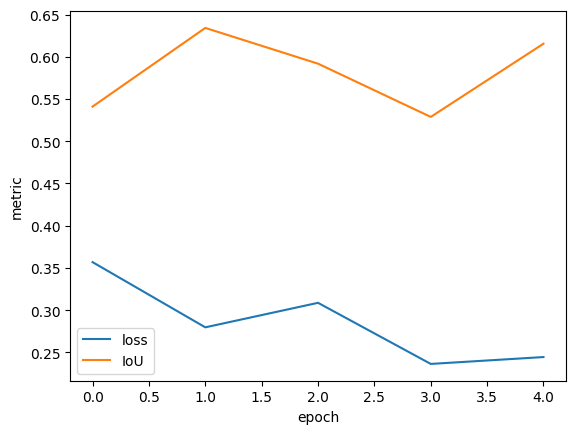

In [ ]:
plt.plot(train_loss, label='loss')
plt.plot(train_iou, label='IoU')

plt.xlabel('epoch')
plt.ylabel('metric')

plt.legend()

plt.show()

Ovim kodom se vrši čuvanje stanja modela na disku kako bi se kasnije moglo koristiti za ponovno učitavanje modela i nastavak treninga ili za upotrebu modela za predviđanja.

In [ ]:
torch.save(model.cpu().state_dict(), MODEL_OUTPUT_PATH)


Prikazani kod služi za prikazivanje nekoliko slika iz trening skupa zajedno sa stvarnom maskom i predviđenom maskom.

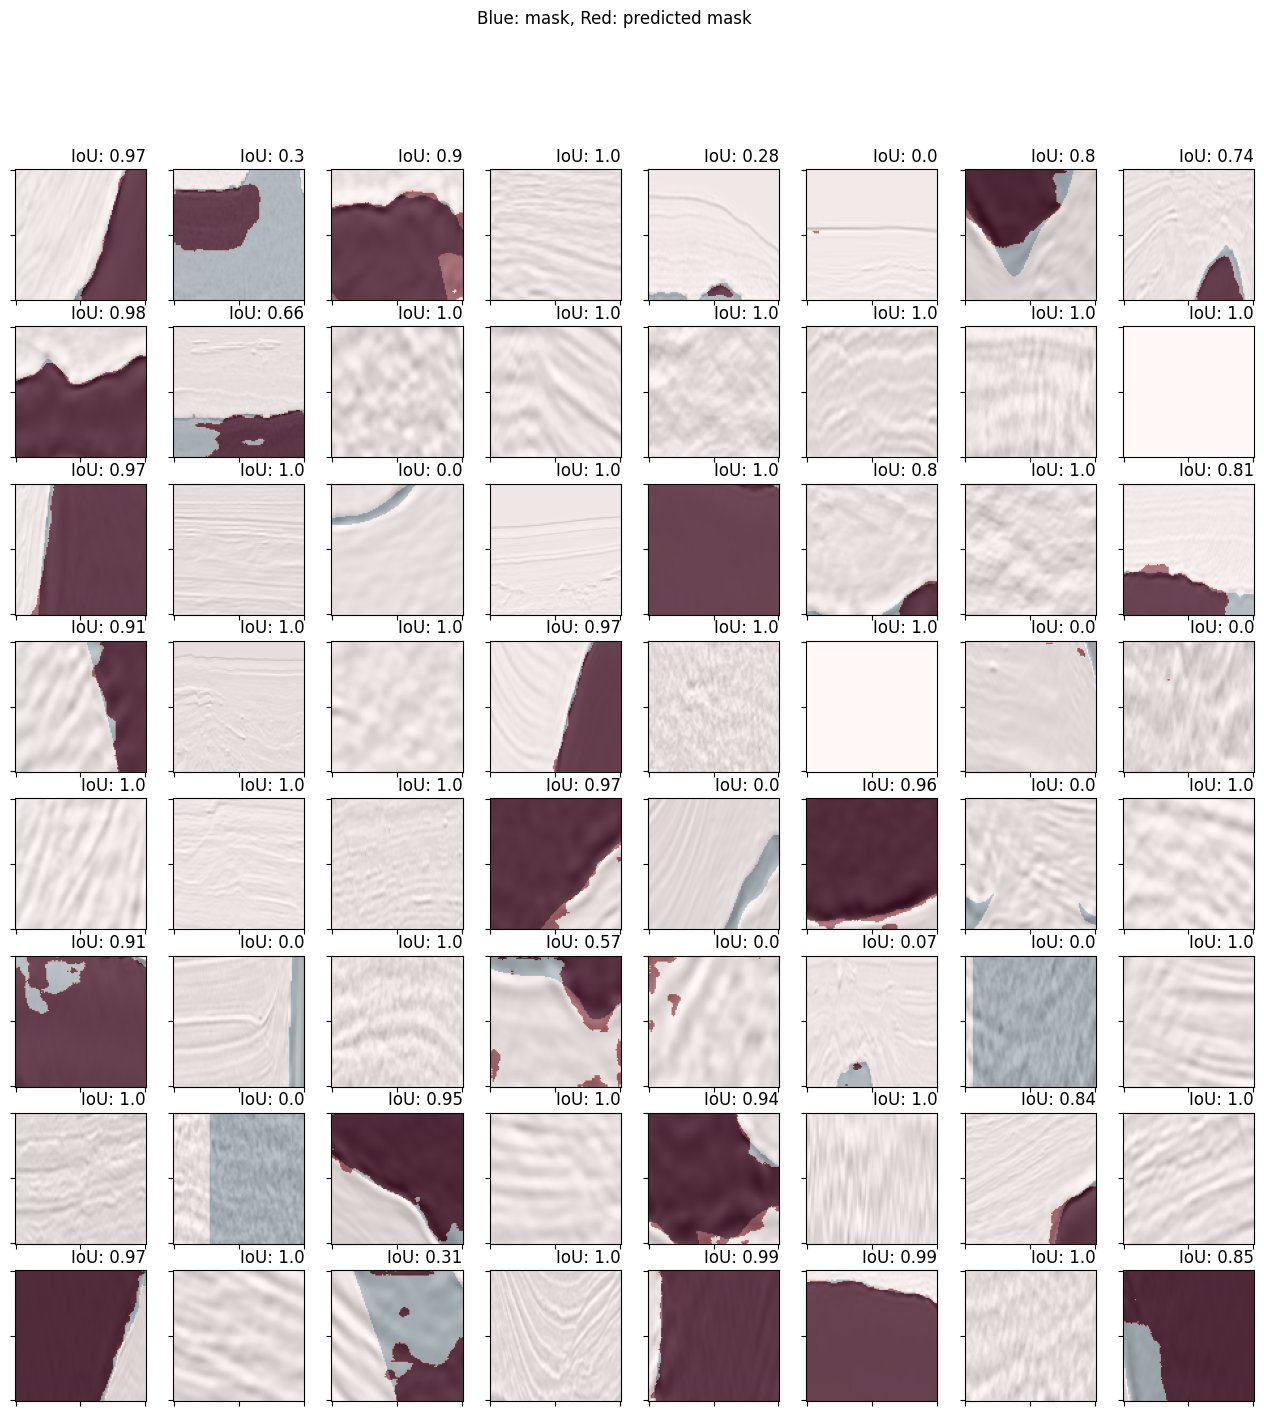

In [ ]:
trainiter = iter(train_dataloader)
images, masks = next(trainiter)

output = model(images)
pred = torch.where(output < 0., torch.zeros_like(output), torch.ones_like(output))
iou = iou_score(output, masks).numpy()

max_images = output.size(0)

grid_width = 8

grid_height = int(max_images / grid_width)

fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width * 2,grid_height * 2))

for i, _data in enumerate(zip(images, masks, pred, iou)):
    image, mask, pred, iou = _data

    ax = axs[int(i / grid_width), i % grid_width]

    ax.imshow(image.squeeze(), cmap='Greys')
    ax.imshow(mask.squeeze(), cmap='PuBu', alpha=0.5)
    ax.imshow(pred.squeeze(), cmap='Reds', alpha=0.5)

    ax.set_title('IoU: ' + str(round(iou, 2)), loc='right')

    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.suptitle('Blue: mask, Red: predicted mask')

plt.show()

Rle_encode je funkcija za kodiranje Run-Length Encoding (RLE) formata. RLE je jednostavan format kompresije koji se često koristi za kodiranje binarnih maski.

Transforms je objekat klase torchvision.transforms.Compose koji se koristi za definisanje transformacija koje se primenjuju na slike. U ovom slučaju, transformacije uključuju konverziju slika u grayscale format i konverziju u tenzore koristeći T.Grayscale() i T.ToTensor() transformacije redom.

In [ ]:
def rle_encode(im):
    pixels = im.flatten(order='F')
    pixels = np.concatenate([[0], pixels, [0]])

    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1

    runs[1::2] -= runs[::2]

    return ' '.join(str(x) for x in runs)

transforms = T.Compose([T.Grayscale(), T.ToTensor()])

Ovaj kod učitava podatke iz CSV fajla SAMPLE_SUBMISSION_PATH i prolazi kroz svaki red u okviru podataka. Za svaki red, izvršava sledeće korake:

* Izvlači vrednost kolone 'id' za trenutni red i dodeljuje je promenljivoj sample.
* Učitava sliku koristeći putanju IMAGE_TEST_PATH i dodajući vrednost sample u ime fajla.
* Primenjuje definisane transformacije na učitanu sliku.
* Prosleđuje transformisanu sliku modelu kako bi dobila izlaz.
* Primjenjuje prag na izlaznom tenzoru kako bi dobio binarnu masku.
* Kodira binarnu masku koristeći funkciju rle_encode i dodaje rezultat u listu rle_mask.

Na kraju, dodaje se nova kolona 'rle_mask' u okvir podataka sub_df, koja sadrži kodirane maske RLE.

In [ ]:
sub_df = pd.read_csv(SAMPLE_SUBMISSION_PATH)

n = sub_df.shape[0]

rle_mask = []

for idx in range(n):
    sample = sub_df['id'][idx]

    image = Image.open(os.path.join(IMAGE_TEST_PATH + '/{}.png'.format(sample)))
    image = transforms(image)

    out = model(image.unsqueeze(0)).squeeze()

    pred = torch.where(out < 0., torch.zeros_like(out), torch.ones_like(out))

    rle_mask.append(rle_encode(pred.numpy()))

sub_df['rle_mask'] = rle_mask

Fajl "submission.csv" je uspešno kreiran. U ovom fajlu su sačuvani podaci okvira sub_df sa dodatom kolonom "rle_mask" koja sadrži kodirane maske RLE. Indeksi nisu uključeni u CSV fajl.

In [ ]:
sub_df.to_csv('submission.csv', index=False)